In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dataset

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')

X = mnist.data.to_numpy()
y = mnist.target.to_numpy().astype(int)

train_images, test_images, train_labels, test_labels = train_test_split(
    X, y, test_size=10000, random_state=42, stratify=y
)

train_images = train_images.reshape(-1, 28, 28)
test_images = test_images.reshape(-1, 28, 28)

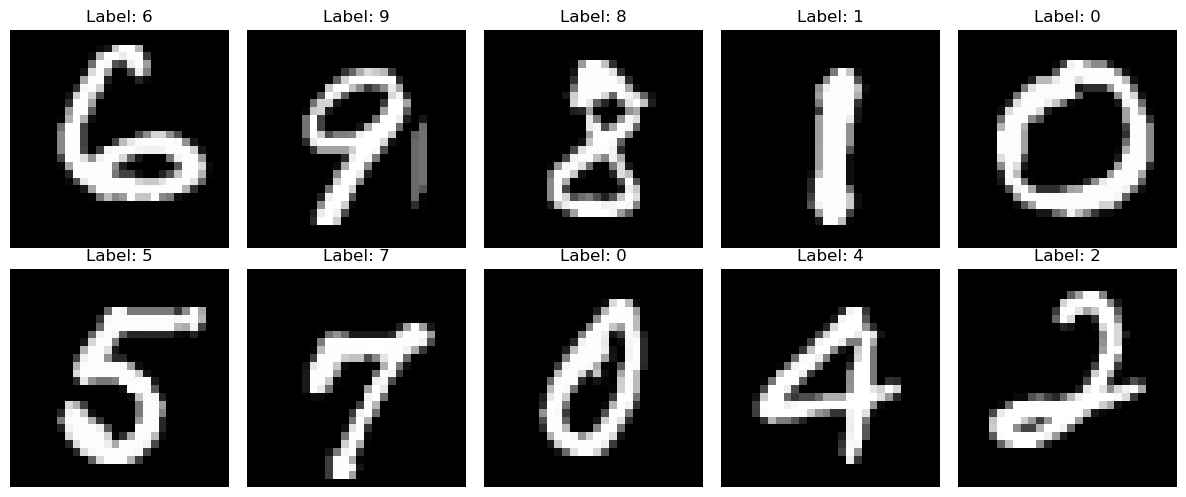

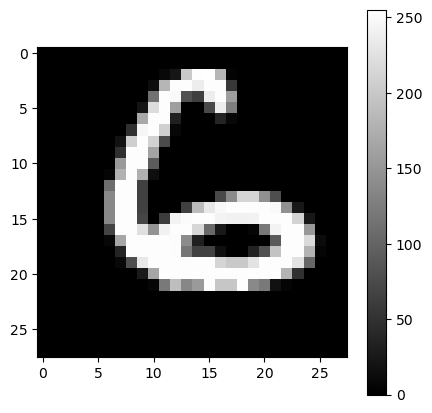

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title(f'Label: {train_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.show()

# Preprocessing

In [ ]:
X_train = train_images.reshape(-1, 28*28)
X_test = test_images.reshape(-1, 28*28)
y_train = train_labels
y_test = test_labels


X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Training

In [ ]:
clf = SVC(kernel='rbf', gamma='scale', C=1)
clf.fit(X_train_scaled, y_train)

# Metric

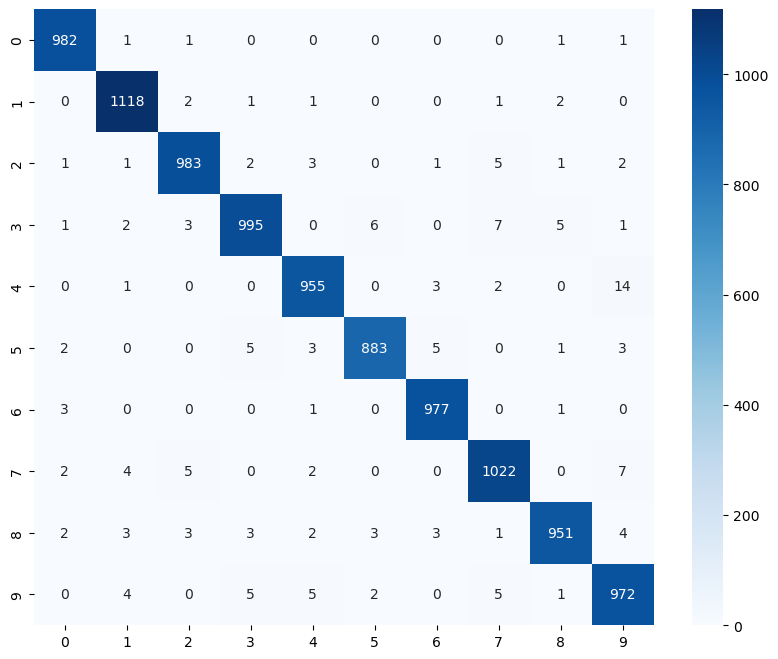

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       986
           1       0.99      0.99      0.99      1125
           2       0.99      0.98      0.98       999
           3       0.98      0.98      0.98      1020
           4       0.98      0.98      0.98       975
           5       0.99      0.98      0.98       902
           6       0.99      0.99      0.99       982
           7       0.98      0.98      0.98      1042
           8       0.99      0.98      0.98       975
           9       0.97      0.98      0.97       994

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
y_pred = clf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.show()

classification_report(y_test, y_pred)

# Save Model

In [ ]:
import pickle

with open('mnist_svm_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

✓ Model and scaler saved successfully!
